In [1]:
import pickle
import seaborn
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from helpers import *

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler


from sklearn.neural_network import MLPClassifier

In [2]:
df = pd.read_csv('../datasets/mimic-ii/full_cohort_data.csv')

In [3]:
display(df.head())

,aline_flg,icu_los_day,hospital_los_day,age,gender_num,weight_first,bmi,sapsi_first,sofa_first,service_unit,...,platelet_first,sodium_first,potassium_first,tco2_first,chloride_first,bun_first,creatinine_first,po2_first,pco2_first,iv_day_1
0,1,7.63,13,72.36841,1.0,75.0,29.912791,15.0,9.0,SICU,...,354.0,138.0,4.6,15.0,109.0,41.0,1.6,196.0,39.0,2230.875000
1,0,1.14,1,64.92076,0.0,55.0,20.121312,NaN,5.0,MICU,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,600.000000
2,0,2.86,5,36.50000,0.0,70.0,27.118272,16.0,5.0,MICU,...,295.0,144.0,3.9,17.0,101.0,16.0,0.8,298.0,30.0,2086.800293
3,1,0.58,3,44.49191,0.0,NaN,NaN,21.0,7.0,SICU,...,262.0,139.0,4.2,31.0,100.0,16.0,0.5,146.0,23.0,NaN
4,1,1.75,5,23.74217,1.0,95.2,28.464563,18.0,7.0,SICU,...,22.0,146.0,3.4,19.0,110.0,10.0,1.0,134.0,30.0,2358.244141


We shall make our goal to predict "Death" (as measured by 'day_28_flg'). To accurately test our methodology we shall build a 'black box' MLP classifier that uses a range of variables to make the predictions. We shall then only use "changeable" variables to act in our prediction.

We begin by "Under Sampling" our data to ensure our accuracy figures are interpretable.

In [4]:
rus = RandomUnderSampler(random_state=0)
under_sampled = rus.fit_resample(df, df.day_28_flg)[0]

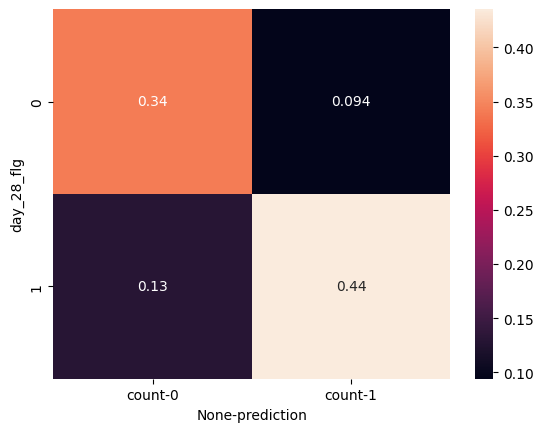

/Users/joshanparmar/Development/TuneableCounterfactuals/src/tests/models/helpers.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  plot_df = df[features+[target_var]].groupby(plot_groupby).agg(['mean', 'count']).dropna()


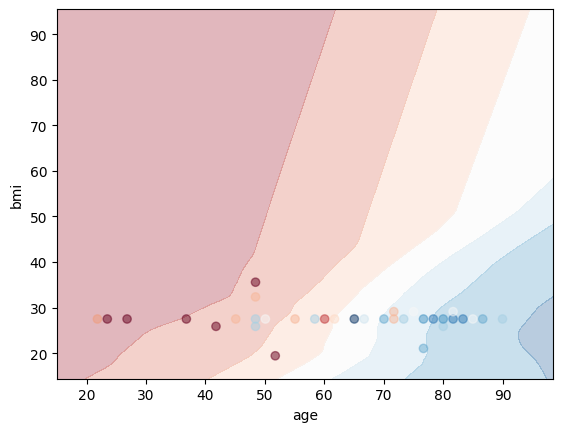

In [5]:
make_model(
    under_sampled,
    MLPClassifier(hidden_layer_sizes=(20,20), max_iter=1000),
    'day_28_flg',
    ['age', 'bmi'],
    plot_heatmap=True,
    plot_decision_boundary=True,
    pre_processing={
        'bmi': 'fill_with_mean'
    }
)

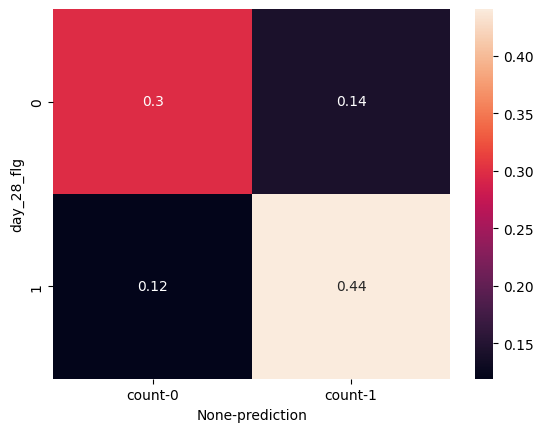

In [6]:
make_model(
    under_sampled,
    MLPClassifier(hidden_layer_sizes=(20,20), max_iter=1000),
    'day_28_flg',
    ['age', 'bmi', 'weight_first'],
    plot_heatmap=True,
    pre_processing={
        'bmi': 'fill_with_mean'
    }
)

/Users/joshanparmar/Development/TuneableCounterfactuals/venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


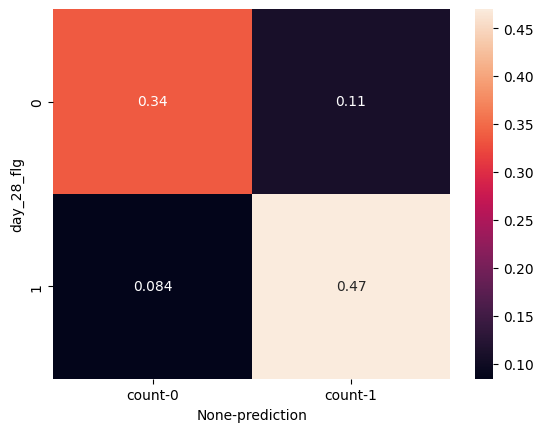

In [7]:
make_model(
    under_sampled,
    MLPClassifier(hidden_layer_sizes=(20,20), max_iter=1000),
    'day_28_flg',
    [
        "age",
        "bmi",
        "weight_first",
        "icu_los_day",
        "hospital_los_day",
        "day_icu_intime_num",
        "hour_icu_intime",
        "map_1st",
        "hr_1st",
        "temp_1st",
        "spo2_1st",
        "abg_count",
        "wbc_first",
        "hgb_first",
        "platelet_first",
        "sodium_first",
        "potassium_first",
        "tco2_first",
        "chloride_first",
        "bun_first",
        "creatinine_first",
    ],
    plot_heatmap=True,
    pre_processing={
        'bmi': 'fill_with_mean'
    }
)